# SF-DAT-21 | Unit Project 2

In this project, you will implement the exploratory analysis plan developed in Unit Project 1.  This will lay the groundwork for our our first modeling exercise in Unit Project 3.

### Step 1: Load the python libraries you will need for this project

In [2]:
# imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
%matplotlib inline

### Step 2: Read in your data set

In [4]:
# read in data from source
df_raw = pd.read_csv("../../dataset/admissions.csv")
print(df_raw.head())

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


## Questions
#### Question 1. How many observations are in our dataset?


In [5]:
df_raw.count()

admit       400
gre         398
gpa         398
prestige    399
dtype: int64

Answer: 400 rows, with 398 rows having values for GRE and GPA and 399 having a value for prestige

#### Question 2. Create a summary table.

In [6]:
df_raw.describe()

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,520.000000,3.13000,2.000000
50%,0.000000,580.000000,3.39500,2.000000
75%,1.000000,660.000000,3.67000,3.000000
max,1.000000,800.000000,4.00000,4.000000


#### Question 3. Why would GRE have a larger STD than GPA?

    Answer: The range of possible GRE scores is much larger than the range of possible GPAs. Specifically, possible GRE scores range from 200 to 800, while possible GPAs range from 0 to 4. Further, in practice, GPAs are generally 2 - 4, since those with GPAs < 2 may not be able to earn the undergraduate degree that is typically a prerequisite for applying to graduate school.

#### Question 4. Drop data points with missing data.


In [17]:
clean_df = df_raw.dropna()
clean_df

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0
5,1,760.0,3.00,2.0
6,1,560.0,2.98,1.0
7,0,400.0,3.08,2.0
8,1,540.0,3.39,3.0
9,0,700.0,3.92,2.0


#### Question 5. Confirm that you dropped the correct data.  How can you tell?

In [21]:
clean_df.isnull().sum()

admit       0
gre         0
gpa         0
prestige    0
dtype: int64

In [ ]:
The above summary stat report shows that none of the columns in the dataframe clean_df have no null values

#### Question 6. Create box plots for GRE and GPA.

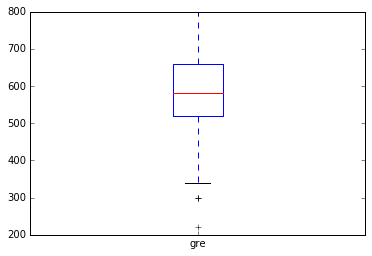

In [34]:
clean_df.plot(kind = 'Box', y = 'gre')

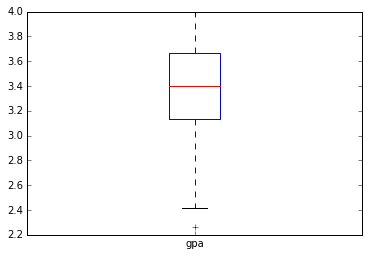

In [35]:
clean_df.plot(kind = 'box', y = 'gpa')

#### Question 7. What do thes plots show?

Answer:
1. GRE scores range from ~350 to 800, with an IQR of ~500-650 and a median of ~580.
2. GPAs range from ~2.4 to 4.0, with an IQR of ~3.1 to 3.6 and a median of 3.40.

#### Question 8. Describe each distribution.

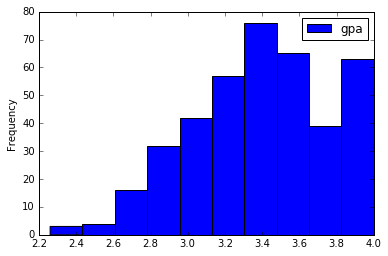

In [36]:
clean_df.plot(kind = 'hist', y = 'gpa')

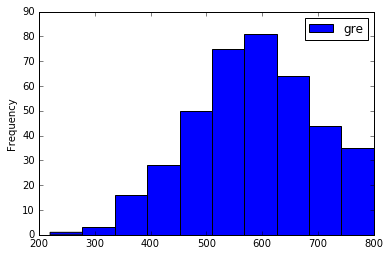

In [37]:
clean_df.plot(kind = 'hist', y = 'gre')

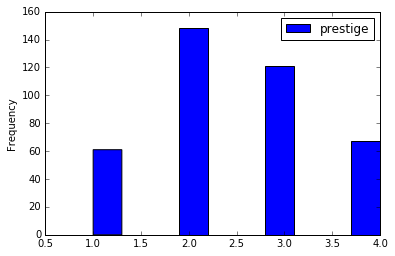

In [38]:
clean_df.plot(kind = 'hist', y = 'prestige')

In [39]:
1. The GPA histogram shows that GPAs skew slightly left.
Interestingly, the sole exception to a normal trend is that applicants are more likely
to have GPAs betwen 3.8 and 4.0 than they are to have GPAs between 3.6 and 3.8.

2. GRE scores follow close to a normal distribution, with most students scoring between 500 and 700.

3. Presige rankings have only four values (1, 2, 3, and 4). Of those, 2 is the most common, with ~40% (140/320)
applying from schools with prestige of 2 and slightly fewer applying from schools with prestige of 3. Applicants from schools
with prestige = 1 or 4 are more rare, with about ~19% (60/320) of the total each.

SyntaxError: invalid syntax (<ipython-input-39-388514c0bb28>, line 1)

#### Question 9. If our model had an assumption of a normal distribution would we meet that requirement?

Answer: Only the GRE data appears to fit a normal distribution requirement.

#### Question 10. Does this distribution need correction?  If so, why?  How?

Answer:

#### Question 11. Which of our variables are potentially colinear?

In [41]:
# create a correlation matrix for the data
clean_df.corr()

,admit,gre,gpa,prestige
admit,1.000000,0.181202,0.174116,-0.243563
gre,0.181202,1.000000,0.382408,-0.124533
gpa,0.174116,0.382408,1.000000,-0.060976
prestige,-0.243563,-0.124533,-0.060976,1.000000


#### Question 12. What did you find?

Answer: GRE and GPA scores appear to be sufficiently correlated to introduce colinearity in the model

#### Question 13. Write an analysis plan for exploring the association between grad school admissions rates and prestige of undergraduate schools.

1. Plot admissions outcomes against prestige, with admissions outcome on the y-axis and prestige on the x-axis).
2. Inspect the visualization and determine what kind of model would be most appropriate (likely to be a logistic regression, given that there are only two possible values for the y-axis variable.
3. Execute the logistic regression.
4. Evaluate the significance of the correlation based on the following criteria. To disprove the null hypothesis (i.e., that there is no correlation between prestige and admission), all of the following should be true:
1. P-value < 0.025
2. Z-score < -2 or > 2
3. Coefficient value should be outside the 95% Confidence Interval.

If all three are true, reject the null hypothesis at 95% confidence. If less than all three are true, fail to reject the null hyptothesis at 95% confidence.


#### Question 14. What is your hypothesis?

My hypothesis is that applicants from more prestigious schools are more likely to be admitted.

## Bonus/Advanced

#### 1. Bonus: Explore alternatives to dropping obervations with missing data.

#### 2. Bonus: Log transform the skewed data.

#### 3. Advanced: Impute missing data.